<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base de dados utilizados tem **351** amostras com **180** variaveis explicativas. Dessas **351** amostras **298** foram usados para **Cross Validation** (treino + teste) e **53** foram usados para a **validação**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [33]:
# Maquina Local 
if (True):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos 

    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina, \
                  treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [34]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [35]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [73]:
seed     = 1471523

In [74]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_tratados_por_paciente.csv"
path = "../../Dados/Tratados/dados_featurewiz.csv"
dados = pd.read_csv(path)

dimensao_dados(dados)

dados.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 28 


,LACTATE_MEAN,AGE_PERCENTIL,PLATELETS_MAX,P02_VENOUS_MAX,PCR_MAX,RESPIRATORY_RATE_MIN,UREA_MEAN,BLOODPRESSURE_SISTOLIC_DIFF,HTN,BE_VENOUS_MEDIAN,...,RESPIRATORY_RATE_MAX,GGT_MEAN,ALBUMIN_MEDIAN,FFA_MEDIAN,TEMPERATURE_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,TEMPERATURE_DIFF_REL,HEART_RATE_MIN,HEART_RATE_MAX,ICU
346,1.000000,-0.333333,-0.895861,-0.704142,-0.565974,-0.357143,-0.860241,-1.0,0.0,-1.000000,...,-0.515152,-0.147196,-0.578947,1.000000,0.142857,-1.0,-1.000000,0.401709,0.059701,1
347,1.000000,1.000000,-0.516689,-0.704142,-0.993195,-0.357143,-0.855422,-1.0,0.0,-1.000000,...,-0.515152,-0.958528,0.605263,-0.742004,-0.059524,-1.0,-0.612627,-0.162393,-0.432836,0
348,1.000000,-0.111111,-0.658211,-0.704142,-0.034405,-0.357143,-0.787952,-1.0,0.0,-1.000000,...,-0.515152,-0.958528,0.605263,-0.742004,-0.071429,-1.0,-1.000000,-0.196581,-0.462687,1
349,1.000000,-0.333333,-0.623498,-0.704142,-0.804159,-0.571429,-0.937349,-1.0,0.0,-1.000000,...,-0.696970,-0.958528,0.605263,-0.742004,-0.107143,-1.0,-1.000000,-0.179487,-0.447761,0
350,-0.897773,-0.111111,-0.479306,-0.857988,-0.906238,-0.428571,-0.879518,-1.0,0.0,-0.717277,...,-0.575758,-0.960280,0.605263,-0.782516,0.535714,-1.0,-1.000000,0.145299,-0.164179,0


In [75]:
dados.describe()

,LACTATE_MEAN,AGE_PERCENTIL,PLATELETS_MAX,P02_VENOUS_MAX,PCR_MAX,RESPIRATORY_RATE_MIN,UREA_MEAN,BLOODPRESSURE_SISTOLIC_DIFF,HTN,BE_VENOUS_MEDIAN,...,RESPIRATORY_RATE_MAX,GGT_MEAN,ALBUMIN_MEDIAN,FFA_MEDIAN,TEMPERATURE_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,TEMPERATURE_DIFF_REL,HEART_RATE_MIN,HEART_RATE_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.494624,-0.046534,-0.505947,-0.692577,-0.823305,-0.398453,-0.841746,-0.949522,0.196581,-0.953730,...,-0.497712,-0.932584,0.571900,-0.728446,0.097772,-0.948718,-0.953900,-0.147393,-0.376494,0.461538
std,0.837465,0.640366,0.209888,0.128432,0.241212,0.229894,0.135197,0.144820,0.397980,0.128238,...,0.215762,0.147390,0.146607,0.165901,0.272230,0.140561,0.119341,0.256381,0.234854,0.499230
min,-0.992765,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.971084,-1.000000,0.000000,-1.000000,...,-0.939394,-0.997664,-0.578947,-0.918977,-0.571429,-1.000000,-1.000000,-0.743590,-0.850746,0.000000
25%,-0.793745,-0.555556,-0.642190,-0.704142,-0.982231,-0.500000,-0.898795,-1.000000,0.000000,-1.000000,...,-0.636364,-0.958528,0.605263,-0.742004,-0.107143,-1.000000,-1.000000,-0.316239,-0.537313,0.000000
50%,1.000000,-0.111111,-0.540721,-0.704142,-0.906238,-0.428571,-0.874699,-1.000000,0.000000,-1.000000,...,-0.575758,-0.958528,0.605263,-0.742004,0.071429,-1.000000,-1.000000,-0.179487,-0.417910,0.000000
75%,1.000000,0.555556,-0.405874,-0.704142,-0.775047,-0.357143,-0.821687,-0.987730,0.000000,-1.000000,...,-0.454545,-0.958528,0.605263,-0.742004,0.250000,-1.000000,-0.975975,-0.008547,-0.268657,1.000000
max,1.000000,1.000000,0.353805,0.372781,1.000000,1.000000,1.000000,0.411043,1.000000,-0.026178,...,0.636364,1.000000,1.000000,1.000000,0.964286,0.200000,-0.066270,1.000000,0.716418,1.000000


In [76]:
dados.std()

LACTATE_MEAN                    0.837465
AGE_PERCENTIL                   0.640366
PLATELETS_MAX                   0.209888
P02_VENOUS_MAX                  0.128432
PCR_MAX                         0.241212
RESPIRATORY_RATE_MIN            0.229894
UREA_MEAN                       0.135197
BLOODPRESSURE_SISTOLIC_DIFF     0.144820
HTN                             0.397980
BE_VENOUS_MEDIAN                0.128238
OXYGEN_SATURATION_MAX           0.121561
BLOODPRESSURE_DIASTOLIC_MIN     0.230099
SAT02_VENOUS_MIN                0.320451
RESPIRATORY_RATE_MEDIAN         0.227309
LINFOCITOS_MIN                  0.153140
SODIUM_MIN                      0.208983
NEUTROPHILES_MEDIAN             0.153260
OXYGEN_SATURATION_MEDIAN        0.123114
RESPIRATORY_RATE_MAX            0.215762
GGT_MEAN                        0.147390
ALBUMIN_MEDIAN                  0.146607
FFA_MEDIAN                      0.165901
TEMPERATURE_MEAN                0.272230
BLOODPRESSURE_DIASTOLIC_DIFF    0.140561
TEMPERATURE_DIFF

In [77]:
_ = variaveis_explicativas(dados)

 col[  0] -> LACTATE_MEAN                   col[  1] -> AGE_PERCENTIL                  
 col[  2] -> PLATELETS_MAX                  col[  3] -> P02_VENOUS_MAX                 
 col[  4] -> PCR_MAX                        col[  5] -> RESPIRATORY_RATE_MIN           
 col[  6] -> UREA_MEAN                      col[  7] -> BLOODPRESSURE_SISTOLIC_DIFF    
 col[  8] -> HTN                            col[  9] -> BE_VENOUS_MEDIAN               
 col[ 10] -> OXYGEN_SATURATION_MAX          col[ 11] -> BLOODPRESSURE_DIASTOLIC_MIN    
 col[ 12] -> SAT02_VENOUS_MIN               col[ 13] -> RESPIRATORY_RATE_MEDIAN        
 col[ 14] -> LINFOCITOS_MIN                 col[ 15] -> SODIUM_MIN                     
 col[ 16] -> NEUTROPHILES_MEDIAN            col[ 17] -> OXYGEN_SATURATION_MEDIAN       
 col[ 18] -> RESPIRATORY_RATE_MAX           col[ 19] -> GGT_MEAN                       
 col[ 20] -> ALBUMIN_MEDIAN                 col[ 21] -> FFA_MEDIAN                     
 col[ 22] -> TEMPERATURE_MEAN   

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [78]:
rng = RandomState(MT19937(SeedSequence(seed)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [79]:
proporcao_y(dados['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


In [80]:
numero_teste_treino_val(dados['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCv **re-treina** esse modelo com o dataset completo (treino+teste). 

In [81]:
n_iter   = 25
n_splits = 5
n_repeats= 10

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O único hyperparametro disponivel foi **strategy**. O intervalor de busca  **[stratified, 'ost_frequent, prior, 'uniform]**. O DummyClassifier será usado como o nosso modelo **"baseline"**



In [82]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'stratified'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x189DA5EA540,
                strategy='stratified')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.5093,0.508149,0.066613,0.036115,0.001641,0.000557,0.002639,0.000869,1
1,{'strategy': 'most_frequent'},0.5000,0.500000,0.000000,0.000000,0.001631,0.000685,0.002890,0.001504,2
2,{'strategy': 'prior'},0.5000,0.500000,0.000000,0.000000,0.001369,0.000638,0.002259,0.000626,2
3,{'strategy': 'uniform'},0.5000,0.500000,0.000000,0.000000,0.001520,0.000662,0.002300,0.000826,2


---
## 4.2) Regreção logistica

> Aqui será treinado do modelo **LogisticRegression**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* C             : [0, 4]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


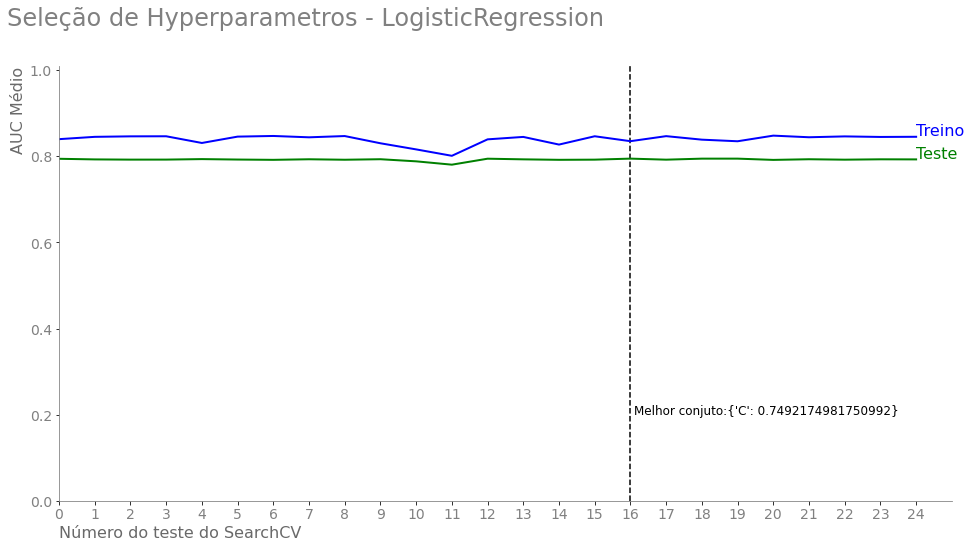

melhores hyperparametros : {'C': 0.7492174981750992}
Melhor modelo            : LogisticRegression(C=0.7492174981750992, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 1.2175467357414327},0.794320,0.839905,0.053504,0.012232,0.026185,0.003462,0.004993,0.000767,5
1,{'C': 2.456649814509979},0.792880,0.845290,0.052514,0.012442,0.034818,0.006674,0.005530,0.003872,13
2,{'C': 2.9478088496923047},0.792373,0.846430,0.051850,0.012536,0.036233,0.005190,0.005878,0.005663,16
3,{'C': 3.0573371354577636},0.792434,0.846614,0.051776,0.012537,0.042884,0.011185,0.007552,0.008880,15
4,{'C': 0.519147839425572},0.793590,0.831046,0.055892,0.011959,0.023909,0.004333,0.005697,0.001734,6
5,{'C': 2.6829570907064726},0.792556,0.845799,0.051956,0.012453,0.034333,0.006064,0.006576,0.008312,14
6,{'C': 3.423750382319948},0.791886,0.847317,0.052235,0.012524,0.035889,0.005904,0.004757,0.001859,22
7,{'C': 2.0987409147362146},0.793205,0.844196,0.052758,0.012254,0.028003,0.003101,0.004498,0.000500,9
8,{'C': 3.3105404641134117},0.792110,0.847122,0.052147,0.012537,0.033924,0.003848,0.004438,0.000496,20
9,{'C': 0.49104712889788615},0.793306,0.830345,0.056154,0.011950,0.018158,0.001317,0.004617,0.000485,7


In [83]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        titulo = 'Seleção de Hyperparametros - LogisticRegression',
                        n = 10,
                        rng=rng)

res

---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


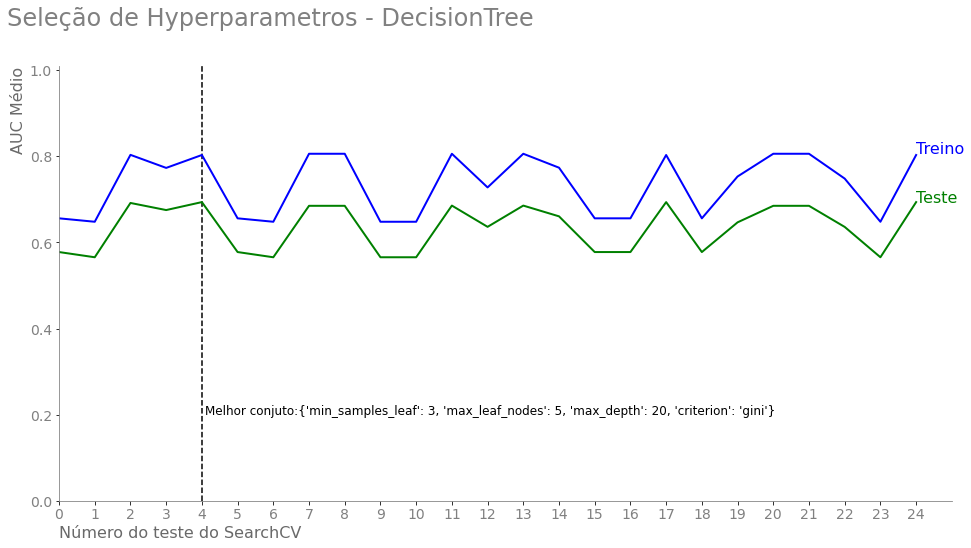

melhores hyperparametros : {'min_samples_leaf': 3, 'max_leaf_nodes': 5, 'max_depth': 20, 'criterion': 'gini'}
Melhor modelo            : DecisionTreeClassifier(max_depth=20, max_leaf_nodes=5, min_samples_leaf=3)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.577718,0.656034,0.048795,0.020735,0.004577,0.000532,0.004198,0.000400,16
1,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.565619,0.648068,0.049896,0.028453,0.004418,0.000493,0.004298,0.000458,21
2,"{'min_samples_leaf': 5, 'max_leaf_nodes': 5, '...",0.691744,0.803458,0.057587,0.012180,0.005077,0.000337,0.004417,0.000493,4
3,"{'min_samples_leaf': 1, 'max_leaf_nodes': 4, '...",0.675233,0.773153,0.052098,0.013559,0.004977,0.000315,0.004457,0.000498,11
4,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.693732,0.803103,0.056949,0.011784,0.005476,0.000574,0.004537,0.000573,1
5,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.577718,0.656034,0.048795,0.020735,0.004697,0.000640,0.004417,0.000532,16
6,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.565619,0.648068,0.049896,0.028453,0.004977,0.000244,0.004297,0.000458,21
7,"{'min_samples_leaf': 4, 'max_leaf_nodes': 5, '...",0.685101,0.805992,0.052579,0.012259,0.005956,0.000344,0.004198,0.000400,7
8,"{'min_samples_leaf': 1, 'max_leaf_nodes': 5, '...",0.685101,0.805992,0.052579,0.012259,0.006036,0.000398,0.004318,0.000466,7
9,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.565619,0.648068,0.049896,0.028453,0.004397,0.000529,0.004557,0.000571,21


In [84]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            titulo = 'Seleção de Hyperparametros - DecisionTree',
                            n = 10,
                            rng=rng)

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **10** iterações. Os hyperparametros foram:
>* n_estimators    : [10, 50, 100, 150, 200]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


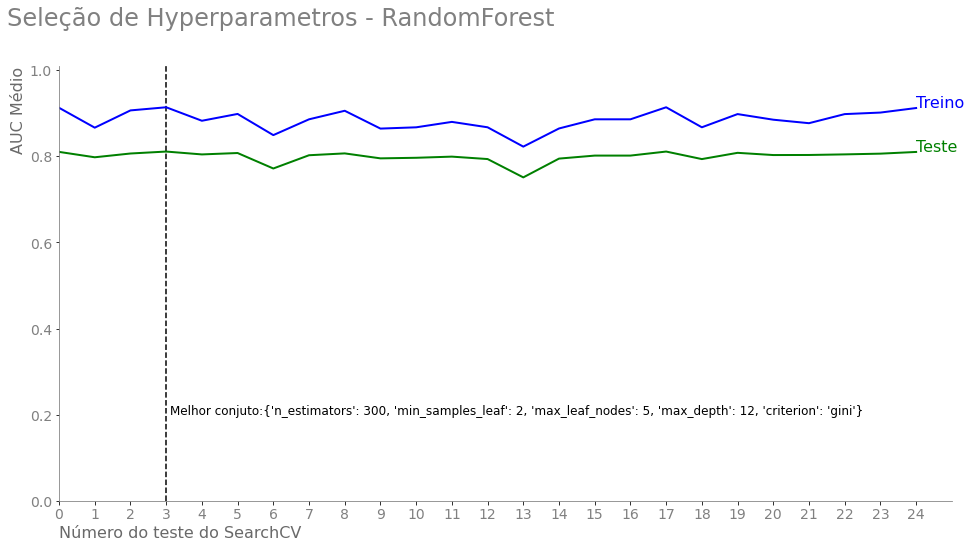

melhores hyperparametros : {'n_estimators': 300, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_depth': 12, 'criterion': 'gini'}
Melhor modelo            : RandomForestClassifier(max_depth=12, max_leaf_nodes=5, min_samples_leaf=2,
                       n_estimators=300,
                       random_state=RandomState(MT19937) at 0x189DA5EA740)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'n_estimators': 200, 'min_samples_leaf': 2, '...",0.810345,0.912778,0.052293,0.006665,0.458058,0.013097,0.039036,0.001347,3
1,"{'n_estimators': 150, 'min_samples_leaf': 2, '...",0.797830,0.866597,0.051816,0.009163,0.326359,0.008285,0.030721,0.001196,18
2,"{'n_estimators': 50, 'min_samples_leaf': 5, 'm...",0.806592,0.906687,0.049159,0.007365,0.125383,0.013670,0.013871,0.000765,8
3,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",0.811116,0.913952,0.051084,0.006354,0.679562,0.011523,0.055666,0.001577,1
4,"{'n_estimators': 200, 'min_samples_leaf': 1, '...",0.804462,0.882645,0.052394,0.008124,0.453961,0.014474,0.039456,0.001525,11
5,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",0.807708,0.898475,0.052015,0.007406,0.582362,0.028501,0.049030,0.003305,6
6,"{'n_estimators': 10, 'min_samples_leaf': 2, 'm...",0.771775,0.849293,0.050392,0.015401,0.032402,0.010404,0.008175,0.001935,24
7,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",0.802566,0.885982,0.050502,0.008299,0.425932,0.063905,0.036807,0.005758,14
8,"{'n_estimators': 50, 'min_samples_leaf': 3, 'm...",0.806836,0.905834,0.052164,0.006964,0.133773,0.015079,0.015536,0.001186,7
9,"{'n_estimators': 100, 'min_samples_leaf': 3, '...",0.795314,0.864456,0.053891,0.009883,0.281125,0.053345,0.026286,0.003384,20


In [85]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_estimators'    : [10, 50, 100, 150, 200, 250, 300],
              'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - RandomForest',
                              n = 10,
                              rng=rng)

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


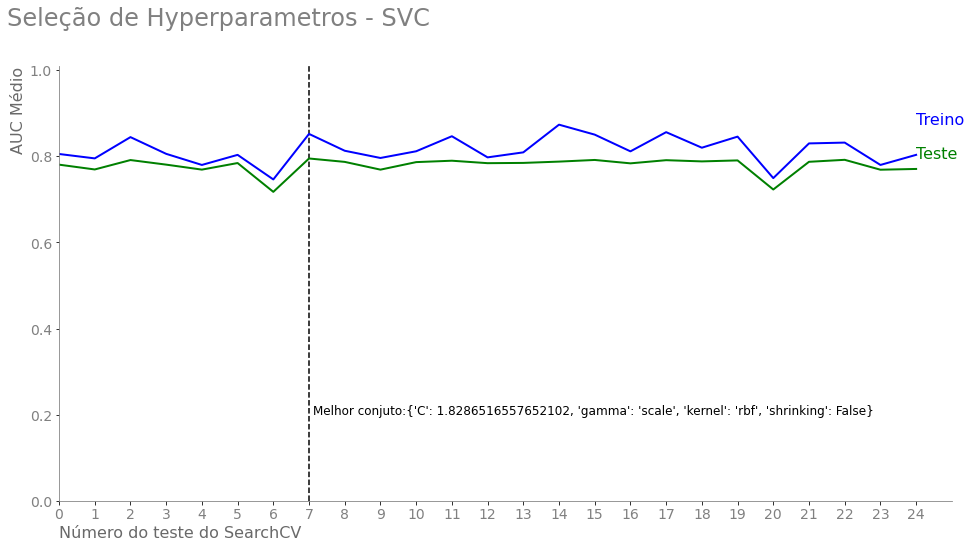

melhores hyperparametros : {'C': 1.8286516557652102, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}
Melhor modelo            : SVC(C=1.8286516557652102, probability=True, shrinking=False)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'C': 0.6087733678707163, 'gamma': 'auto', 'ke...",0.780690,0.805474,0.058896,0.013549,0.040688,0.001978,0.008565,0.001284,18
1,"{'C': 1.1919973308493834, 'gamma': 'auto', 'ke...",0.769533,0.795240,0.059582,0.013545,0.033984,0.001974,0.006276,0.000825,20
2,"{'C': 1.3414785453532363, 'gamma': 'scale', 'k...",0.791379,0.844626,0.048694,0.010477,0.025029,0.001019,0.005817,0.000767,4
3,"{'C': 0.6182682488506304, 'gamma': 'auto', 'ke...",0.780751,0.805814,0.058960,0.013602,0.040634,0.001603,0.008155,0.000833,17
4,"{'C': 0.09161178303222162, 'gamma': 'auto', 'k...",0.769168,0.780025,0.060381,0.013035,0.037740,0.002236,0.006836,0.001026,21
5,"{'C': 1.067968630753091, 'gamma': 'auto', 'ker...",0.784442,0.803441,0.059231,0.013293,0.030452,0.010071,0.007156,0.006299,14
6,"{'C': 1.537307483968221, 'gamma': 'scale', 'ke...",0.717525,0.746346,0.062980,0.018584,0.041077,0.001264,0.006796,0.000848,25
7,"{'C': 1.8286516557652102, 'gamma': 'scale', 'k...",0.795010,0.852088,0.055733,0.009802,0.036759,0.001253,0.007713,0.000798,1
8,"{'C': 1.9473655752001813, 'gamma': 'auto', 'ke...",0.787120,0.812970,0.057893,0.012644,0.028054,0.002048,0.006287,0.001009,11
9,"{'C': 1.264838942734859, 'gamma': 'auto', 'ker...",0.769108,0.796208,0.059503,0.013508,0.034121,0.001864,0.006396,0.000871,22


In [86]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'kernel'          : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C'               : uniform(loc=0, scale=2),
              'gamma'           : ['scale', 'auto'],
              'shrinking'       : [True, False]
             }

modelo = SVC(probability=True)

melhor_modelo_svc, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - SVC',
                              n = 10,
                              rng=rng)

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


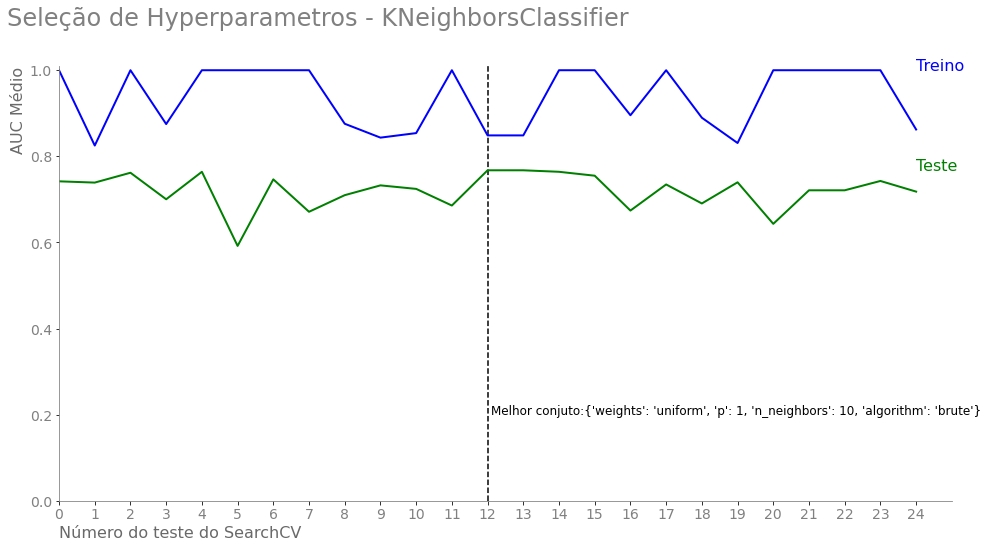

melhores hyperparametros : {'weights': 'uniform', 'p': 1, 'n_neighbors': 10, 'algorithm': 'brute'}
Melhor modelo            : KNeighborsClassifier(algorithm='brute', n_neighbors=10, p=1)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.741968,1.000000,0.058558,0.000000,0.005816,0.001945,0.007097,0.000898,9
1,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.739047,0.825100,0.058426,0.015572,0.005767,0.000611,0.007155,0.000643,11
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.761897,1.000000,0.057199,0.000000,0.004212,0.000645,0.006534,0.000701,5
3,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.700294,0.874967,0.059410,0.012177,0.004095,0.000700,0.006296,0.000699,19
4,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.764108,1.000000,0.057509,0.000000,0.005685,0.000813,0.007216,0.000807,3
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.591978,1.000000,0.042461,0.000000,0.005020,0.000756,0.006480,0.000731,25
6,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.746562,1.000000,0.056115,0.000000,0.004457,0.000921,0.006896,0.001099,7
7,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.671237,1.000000,0.056286,0.000000,0.004737,0.001091,0.006887,0.001126,23
8,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.709828,0.875674,0.058763,0.012303,0.006516,0.004545,0.007529,0.003161,18
9,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.732576,0.843449,0.054700,0.013366,0.004117,0.000588,0.005936,0.000759,13


In [87]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_neighbors'     : np.arange(1, 11),
              'p'               : [1, 2],
              'weights'         : ['uniform', 'distance'],
              'algorithm'       : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

modelo = KNeighborsClassifier()

melhor_modelo_kn, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - KNeighborsClassifier',
                              n = 10,
                              rng=rng)

res


# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [88]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [89]:
desempenho_dos_modelos(modelos, x_val, y_val)

,Name,tn,fp,fn,tp,AUC
0,RandomForestClassifier,14,5,5,12,0.832817
1,KNeighborsClassifier,19,0,7,10,0.770898
2,SVC,14,5,5,12,0.739938
3,LogisticRegression,13,6,8,9,0.724458
4,DecisionTreeClassifier,9,10,2,15,0.633127
5,DummyClassifier,10,9,7,10,0.577399


> DataFrame com os resultados

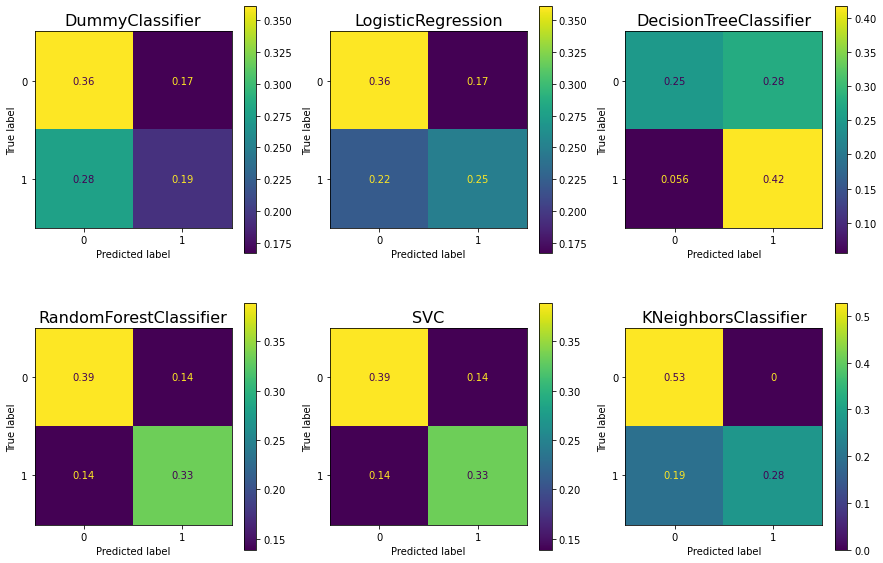

In [90]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> A Matriz de confusão dos modelos. Os paramentro mais crítico para o nosso modelo é o **falso negativo** (FN).

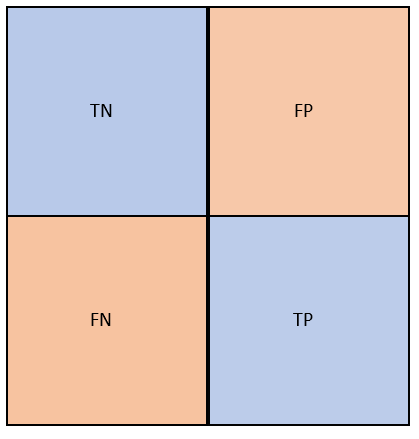

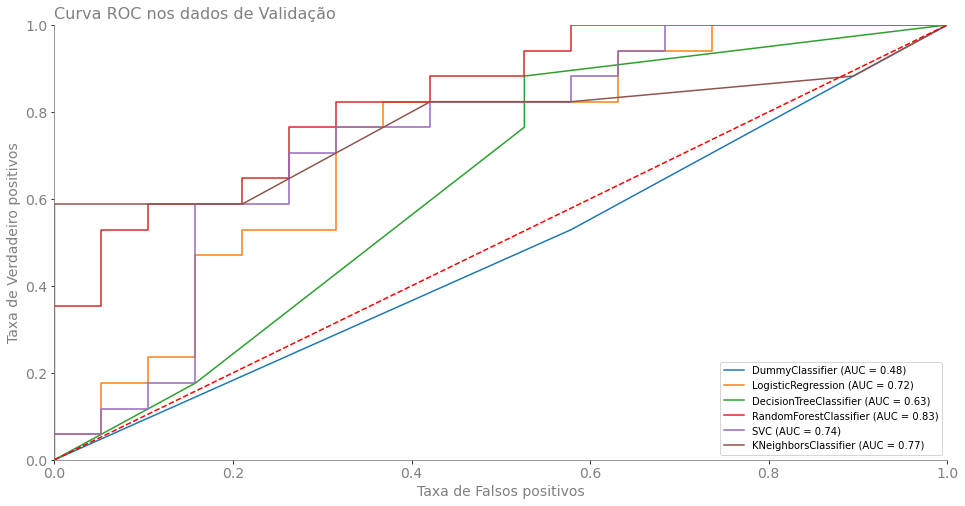

In [91]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> A curva ROC dos modelos para os dados de validação. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado

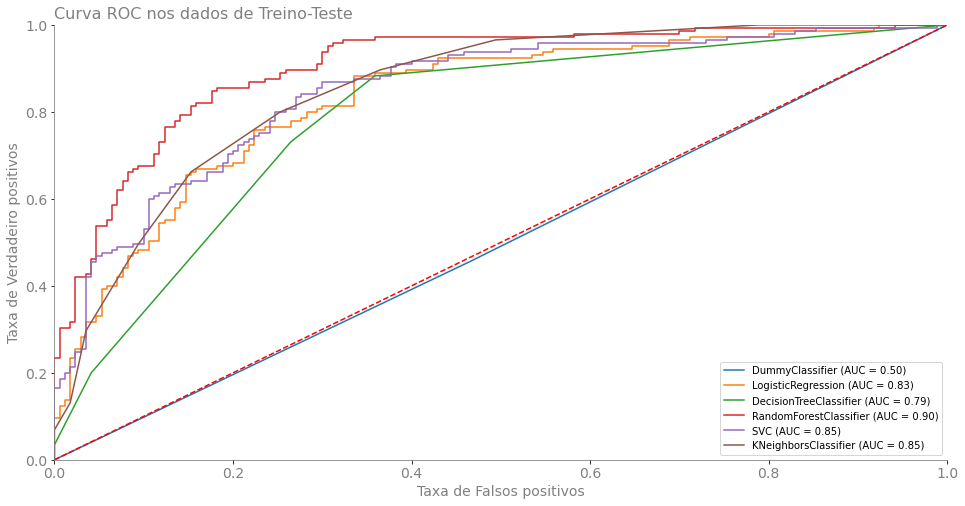

In [92]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado.  

# 6) Conclusão